# Tutorial: CommonRoad Carla Traffic generation mode 
## Generating, Visualizing, and Writing CommonRoad Scenarios

This tutorial shows how CommonRoad Carla Traffic geration mode can be used, visualized, and stored. 

In [1]:
import time
from commonroad.scenario.trajectory import State
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib notebook
from ipywidgets import interact
import ipywidgets as widgets
import math

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

# import classes and functions for reading xml file and visualizing commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer
from carlacr.mode.carla_traffic_generation_mode import CarlaTrafficGenerationMode

pygame 2.0.3 (SDL 2.0.16, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Import the map 

In [2]:
startTime = time.time()
traffic_generation = CarlaTrafficGenerationMode(open_drive_map_path="/home/hoaquin/Desktop/test.xodr")

## Auto generate a scenario

In [3]:
# you can reduce the carla_vehicles and the time_steps if you GPU is not really strong
traffic_generation.traffic_generate(carla_vehicles=150,time_steps=80)
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


Execution time in seconds: 75.05320358276367


## Visualize scenario with commonroad 

In [4]:
obstacle_id = traffic_generation.scenario.dynamic_obstacles[10].obstacle_id
print(obstacle_id)
obstacle = traffic_generation.scenario.obstacle_by_id(obstacle_id)
traffic_generation.scenario.remove_obstacle(obstacle)
time_end = obstacle.prediction.trajectory.final_state.time_step + 1

53779


<IPython.core.display.Javascript object>


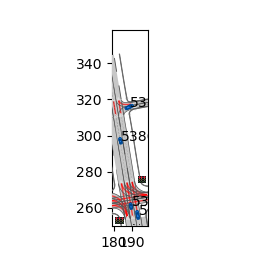

interactive(children=(IntSlider(value=0, description='time_step', max=80), Output()), _dom_classes=('widget-in…

In [5]:
plt.figure(figsize=(1*2.54, 1*2.54))
def draw_scenario(time_step):
    rnd = MPRenderer()
    rnd.plot_limits = [min(-10, -100*math.cos(obstacle.state_at_time(time_step).orientation)), 
                               max(10, 200*math.cos(obstacle.state_at_time(time_step).orientation)), 
                               min(-10, 200*math.sin(obstacle.state_at_time(time_step).orientation)), 
                               max(10, 100*math.sin(obstacle.state_at_time(time_step).orientation))]
    traffic_generation.scenario.draw(rnd, draw_params={'time_begin': 0, 
                                    'time_end': 80,
                                    'focus_obstacle_id': obstacle_id,
                                    'dynamic_obstacle': {
                                        'draw_icon': True,
                                        'show_label': True}})
    obstacle.draw(rnd, draw_params = {'time_begin': 0, 
                                      'time_end': 80,
                                      'focus_obstacle_id': obstacle_id,
                                      'dynamic_obstacle': {'draw_icon': True, 
                                                           'show_label': True,
                                      'vehicle_shape': {'occupancy': {'shape': {'polygon': {'facecolor': 'g',
                                                                                           'edgecolor': 'k'}}}}}})
    rnd.render()
    

interact(draw_scenario, time_step=widgets.IntSlider(min=obstacle.initial_state.time_step, max=obstacle.prediction.trajectory.final_state.time_step, step=1, value=obstacle.initial_state.time_step));

In [6]:
#traffic_generation.visualize()